# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 3: 모델링

## [미션]

- 모델링을 수행합니다.
    - 전처리를 추가로 진행합니다.
    - 4개 이상의 알고리즘을 사용해 모델링을 수행합니다.
    - 각 모델에 대해 성능 튜닝을 수행합니다.
    - 성능을 비교해 최선의 모델을 선정합니다.
- 데이터 파이프라인 함수를 만듭니다.
- 새로운 데이터를 읽어와 예측을 수행합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [3]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [6]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [8]:
# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 모델링용 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

# 기타 라이브러리 불러기기
import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 base_data2.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 data 데이터프레임으로 선언하고 기본 정보를 확인합니다.

In [10]:
# 파일 읽어오기
data = joblib.load(path+'base_data2.pkl')

# 확인
data.head()

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적0_10,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,0,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,0,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [11]:
# 데이터 살펴보기
data.head(3)

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적0_10,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,0,78,0,0,0,56962000.0,642930.0
1,35,2013,복도식,개별,1,35,1569.1668,0,35,0,0,0,0,0,0,63062000.0,470100.0
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,0,88,0,0,0,72190000.0,586540.0


In [12]:
# 하위 몇 개 행 확인
data.tail()

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적0_10,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
340,1485,1993,복도식,중앙,1,298,64622.2500,0,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,1386,1993,복도식,중앙,1,258,57616.8100,0,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,956,1994,복도식,지역,1,243,37398.7200,0,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,120,2020,복도식,개별,1,47,5581.8024,0,66,54,0,0,0,0,0,2.515500e+06,50040.000000
344,447,1994,복도식,중앙,1,78,19383.4100,0,149,298,0,0,0,0,0,7.628000e+06,125010.000000


In [13]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   총세대수      345 non-null    int64  
 1   준공연도      345 non-null    int32  
 2   건물형태      345 non-null    object 
 3   난방방식      345 non-null    object 
 4   승강기설치여부   345 non-null    int64  
 5   실차량수      345 non-null    int64  
 6   총면적       345 non-null    float64
 7   면적0_10    345 non-null    int64  
 8   면적10_30   345 non-null    int64  
 9   면적30_40   345 non-null    int64  
 10  면적40_50   345 non-null    int64  
 11  면적50_60   345 non-null    int64  
 12  면적60_70   345 non-null    int64  
 13  면적70_80   345 non-null    int64  
 14  면적80_200  345 non-null    int64  
 15  임대보증금     345 non-null    float64
 16  임대료       345 non-null    float64
dtypes: float64(3), int32(1), int64(11), object(2)
memory usage: 44.6+ KB


In [14]:
# 데이터프레임의 행과 열 개수
data.shape

(345, 17)

In [15]:
# 상관관계 확인
data.corr(numeric_only=True)

,총세대수,준공연도,승강기설치여부,실차량수,총면적,면적0_10,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
총세대수,1.000000,0.085396,0.129458,0.712475,0.927286,NaN,0.373339,0.597814,0.589794,0.387626,0.056001,0.092164,0.021211,0.172154,0.203985
준공연도,0.085396,1.000000,0.212851,0.287266,0.171747,NaN,0.120319,-0.159878,-0.059953,0.079040,0.066059,0.248191,0.229966,0.331838,0.325513
승강기설치여부,0.129458,0.212851,1.000000,0.187295,0.152063,NaN,0.049852,-0.023853,0.114433,0.074197,0.010745,0.042019,0.056095,0.103886,0.118845
실차량수,0.712475,0.287266,0.187295,1.000000,0.822183,NaN,0.077284,0.211912,0.392055,0.381746,0.151615,0.339168,0.340284,0.361867,0.337066
총면적,0.927286,0.171747,0.152063,0.822183,1.000000,NaN,0.174025,0.410497,0.486441,0.457999,0.102296,0.327435,0.304440,0.361495,0.368626
면적0_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
면적10_30,0.373339,0.120319,0.049852,0.077284,0.174025,NaN,1.000000,0.161576,0.047730,-0.124520,-0.016124,-0.063058,-0.084182,-0.087044,-0.062674
면적30_40,0.597814,-0.159878,-0.023853,0.211912,0.410497,NaN,0.161576,1.000000,0.376596,-0.132072,-0.043037,-0.168306,-0.224689,-0.121064,-0.085508
면적40_50,0.589794,-0.059953,0.114433,0.392055,0.486441,NaN,0.047730,0.376596,1.000000,-0.074343,-0.038634,-0.151085,-0.201694,-0.069538,-0.068149
면적50_60,0.387626,0.079040,0.074197,0.381746,0.457999,NaN,-0.124520,-0.132072,-0.074343,1.000000,-0.029779,-0.078286,-0.125007,0.141206,0.164231


### (6) 함수 생성

- 실젯값과 모델이 예측한 값을 시각화해 비교할 함수를 만듭니다.

In [25]:
# 실젯값, 예측값 비교 함수 만들기
def model_plot(y_test, y_pred):
    plt.figure(figsize=(10, 3))
    plt.plot(y_test.values, label='Actual', linewidth=0.7, marker='o', markersize=2)
    plt.plot(y_pred, label='Predicted', linewidth=0.7, marker='o', markersize=2)
    plt.legend()
    plt.show()

## 
2. 모델링

- 모델링을 위한 결측치 처리, 데이터 분할, 스케일링, 가변수화 등을 수행합니다.
- 4개 이상의 알고리즘을 사용하여 모델을 만듭니다.
- 모델 이름은 서로 다르게 합니다. (예: model1, model2...)
- Linear Regression 이외의 알고리즘을 사용한 모델은 GridSearchCV() 함수로 성능 최적화를 수행합니다.
- 적절한 평가지표로 모델의 성능을 평가합니다.
- 실젯값과 예측값을 시각화해 비교합니다.
- 성능 비교를 통해 최선의 모델을 선정합니다.

### (1) 데이터 전처리

- 필요한 전처리를 수행합니다.

#### 1) 가변수화

- '건물형태', '난방방식' 변수에 대해 가변수화를 수행합니다.

In [30]:
# 가변수화 대상: '건물형태', '난방방식'
dumm_cols = ['건물형태', '난방방식']

# 가변수화
data = pd.get_dummies(data, columns=dumm_cols, drop_first=True, dtype=int)

# 확인
data.head()

,총세대수,준공연도,승강기설치여부,실차량수,총면적,면적0_10,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료,건물형태_복도식,건물형태_혼합식,난방방식_중앙,난방방식_지역
0,78,2013,1,109,6023.7683,0,0,0,0,78,0,0,0,5.696200e+07,642930.000000,0,0,0,0
1,35,2013,1,35,1569.1668,0,35,0,0,0,0,0,0,6.306200e+07,470100.000000,1,0,0,0
2,88,2013,1,88,7180.1396,0,0,0,0,88,0,0,0,7.219000e+07,586540.000000,0,0,0,0
3,477,2014,1,943,47058.9273,0,0,0,0,150,0,216,111,1.015167e+08,950305.000000,1,0,0,1
4,15,2013,1,21,543.0268,0,15,0,0,0,0,0,0,5.522750e+07,340148.333333,1,0,0,0


#### 2) x, y 분리

- Target를 지정하고, x와 y로 분리합니다.

In [33]:
# target 확인
target = '실차량수'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 3) 학습용, 평가용 분리

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.

In [36]:
# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#### 4) 스케일링

- 필요한 경우 스케일링을 진행합니다.
- 예를 들어 KNN 알고리즘을 사용할 경우입니다.

In [39]:
# 정규화
scaler = MinMaxScaler()
# scaler.fit(x_train)
x_train_ = scaler.fit_transform(x_train)
x_test_ = scaler.transform(x_test)

### (2) 모델 1

In [41]:
# 모델 정의 및 학습
# 파라미터 선언
param = {'max_depth': range(1, 21)}

# 선언하기
model1 = GridSearchCV(DecisionTreeRegressor(),
                     param,
                     cv=5)

# 학습하기
model1.fit(x_train, y_train)

# 결과확인
print('* 파라미터:', model1.best_params_)
print('* 예측성능:', model1.best_score_)

# 예측하기
y_pred1 = model1.predict(x_test)

# 평가하기
print('* MAE:', mean_absolute_error(y_test, y_pred1))
print('* R2:', r2_score(y_test, y_pred1))
result = {}
result['Decision Tree'] = r2_score(y_test, y_pred1)

* 파라미터: {'max_depth': 3}
* 예측성능: 0.6651537158010903
* MAE: 174.65043205396978
* R2: 0.6113863442949945


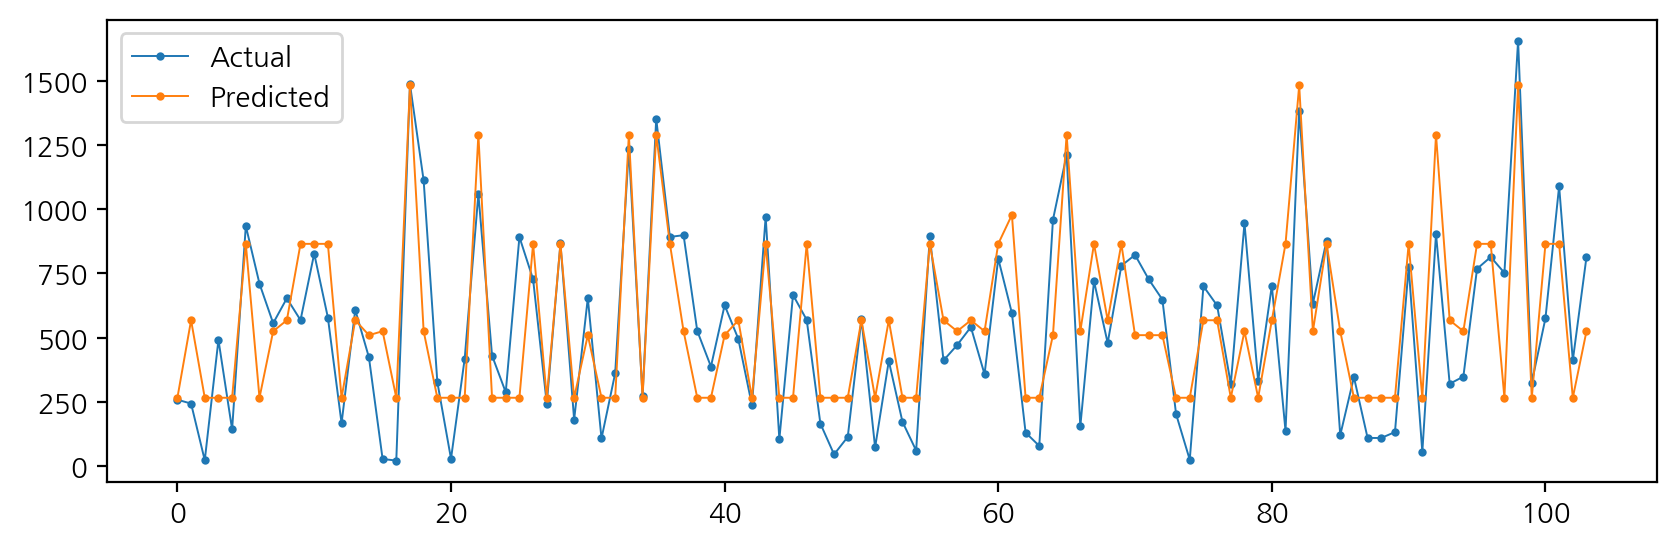

In [43]:
# 실젯값과 예측값 비교 시각화
model_plot(y_test, y_pred1)

### (3) 모델 2

In [45]:
# 파라미터 선언
param = {'n_neighbors': range(1, 21)}

# GridSearchCV 객체 생성
model2 = GridSearchCV(KNeighborsRegressor(),
                      param,
                      cv=5,
                      scoring='r2',
                      n_jobs=-1)

# 학습하기
model2.fit(x_train_, y_train)

# 최적의 파라미터와 점수 확인
print('* 파라미터:', model2.best_params_)
print('* 예측성능 (Best CV R^2 Score):', model2.best_score_)

# 최적의 모델로 예측하기
y_pred2 = model2.predict(x_test_)

# 평가하기
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print('* 최적의 모델로 평가한 MAE:', mae)
print('* 최적의 모델로 평가한 R2:', r2)

result['KNN'] = r2

* 파라미터: {'n_neighbors': 4}
* 예측성능 (Best CV R^2 Score): 0.6761371915901122
* 최적의 모델로 평가한 MAE: 164.60096153846155
* 최적의 모델로 평가한 R2: 0.6129804776167364


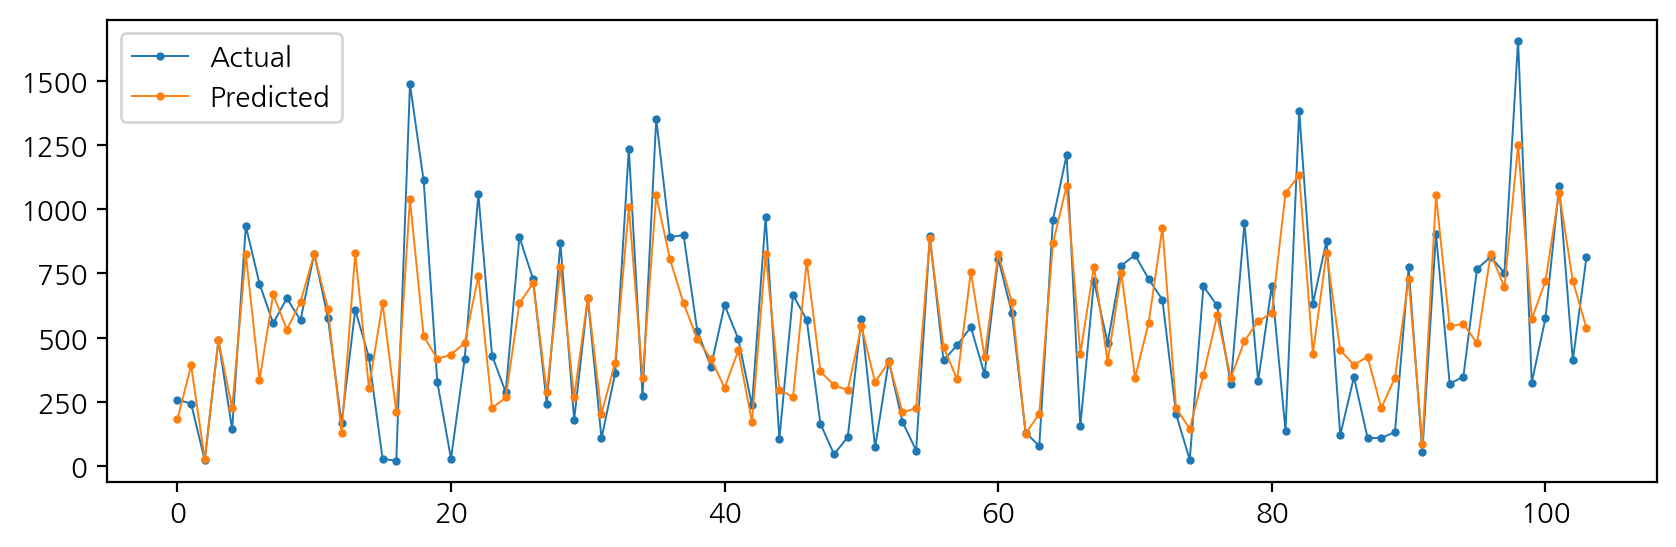

In [48]:
# 실젯값과 예측값 비교 시각화
model_plot(y_test, y_pred2)

### (4) 모델 3

In [50]:
# 파라미터 선언
param = {'max_depth': range(1, 21)}

# 선언하기
model3 = GridSearchCV(RandomForestRegressor(),
                     param,
                     cv=5)

# 학습하기
model3.fit(x_train, y_train)

# 결과확인
print('* 파라미터:', model3.best_params_)
print('* 예측성능:', model3.best_score_)

# 예측하기
y_pred3 = model3.predict(x_test)

# 평가하기
print('* MAE:', mean_absolute_error(y_test, y_pred3))
print('* R2:', r2_score(y_test, y_pred3))

result['Random Forest'] = r2_score(y_test, y_pred3)

* 파라미터: {'max_depth': 5}
* 예측성능: 0.7586816055636966
* MAE: 134.88739804380185
* R2: 0.6927756635898159


In [51]:
# 최적의 모델의 모든 하이퍼파라미터 값 출력
best_params = model3.best_estimator_.get_params()
print("최적의 모델에 사용된 하이퍼파라미터:")
for param, value in best_params.items():
    print(f"{param}: {value}")

최적의 모델에 사용된 하이퍼파라미터:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: 5
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [59]:
# 파라미터 선언
param = {'max_depth': range(1, 21)}

# 모델 선언 (random_state를 모델에 설정)
rf_model = RandomForestRegressor(random_state=1)

# GridSearchCV 객체 생성
model3 = GridSearchCV(rf_model,
                      param,
                      cv=5)

# 학습하기
model3.fit(x_train, y_train)

# 결과확인
print('* 파라미터:', model3.best_params_)
print('* 예측성능:', model3.best_score_)

# 예측하기
y_pred3 = model3.predict(x_test)

# 평가하기
mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print('* MAE:', mae)
print('* R2:', r2)

result['Random Forest'] = r2

* 파라미터: {'max_depth': 4}
* 예측성능: 0.7574485715801873
* MAE: 138.03102758238398
* R2: 0.6876475342158248


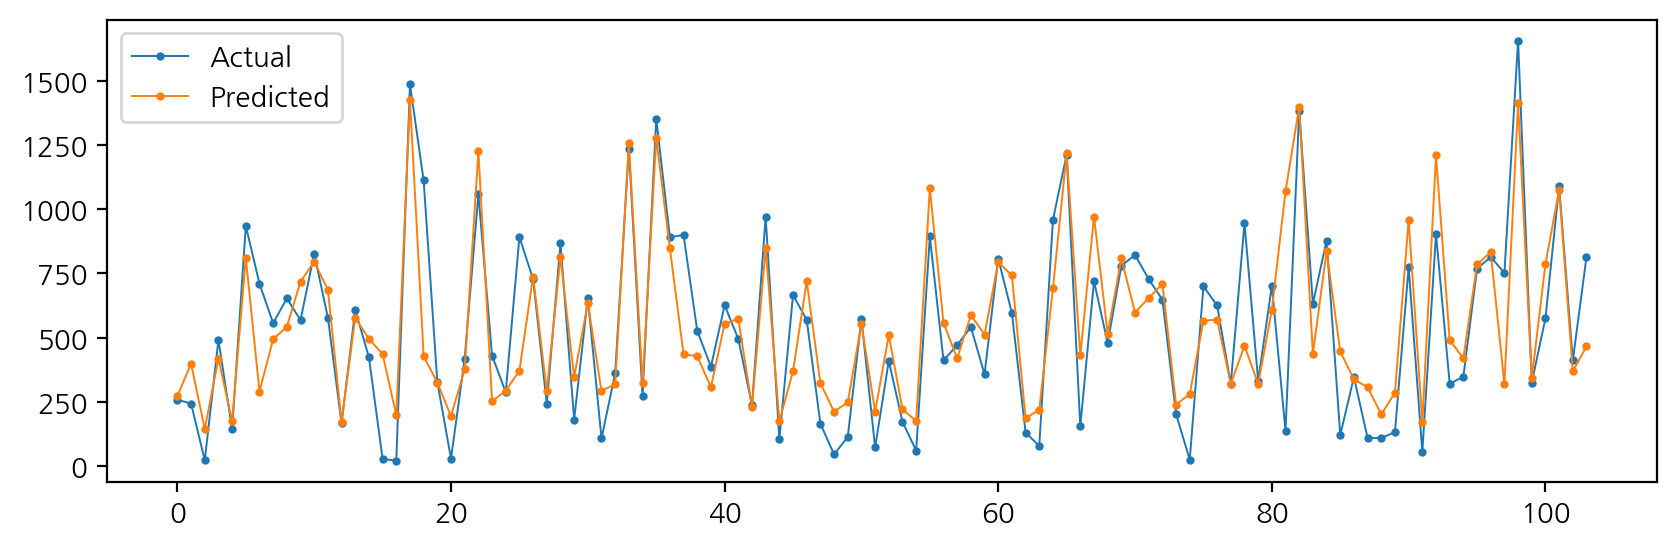

In [60]:
# 실젯값과 예측값 비교 시각화
model_plot(y_test, y_pred3)

### (5) 모델 4

In [63]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# 파라미터 선언
param = {'max_depth': range(1, 21)}

# GridSearchCV 객체 생성
model4 = GridSearchCV(XGBRegressor(random_state=1),
                      param,
                      cv=5,
                      scoring='r2',
                      n_jobs=-1)

# 학습하기
model4.fit(x_train, y_train)

# 최적의 파라미터와 점수 확인
print('* 파라미터:', model4.best_params_)
print('* 예측성능 (Best CV R^2 Score):', model4.best_score_)

# 최적의 모델로 예측하기
y_pred4 = model4.predict(x_test)

# 평가하기
mae = mean_absolute_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print('* 최적의 모델로 평가한 MAE:', mae)
print('* 최적의 모델로 평가한 R2:', r2)

result['XGBoost'] = r2

* 파라미터: {'max_depth': 1}
* 예측성능 (Best CV R^2 Score): 0.7235627955495929
* 최적의 모델로 평가한 MAE: 133.9036045074463
* 최적의 모델로 평가한 R2: 0.6917700925614235


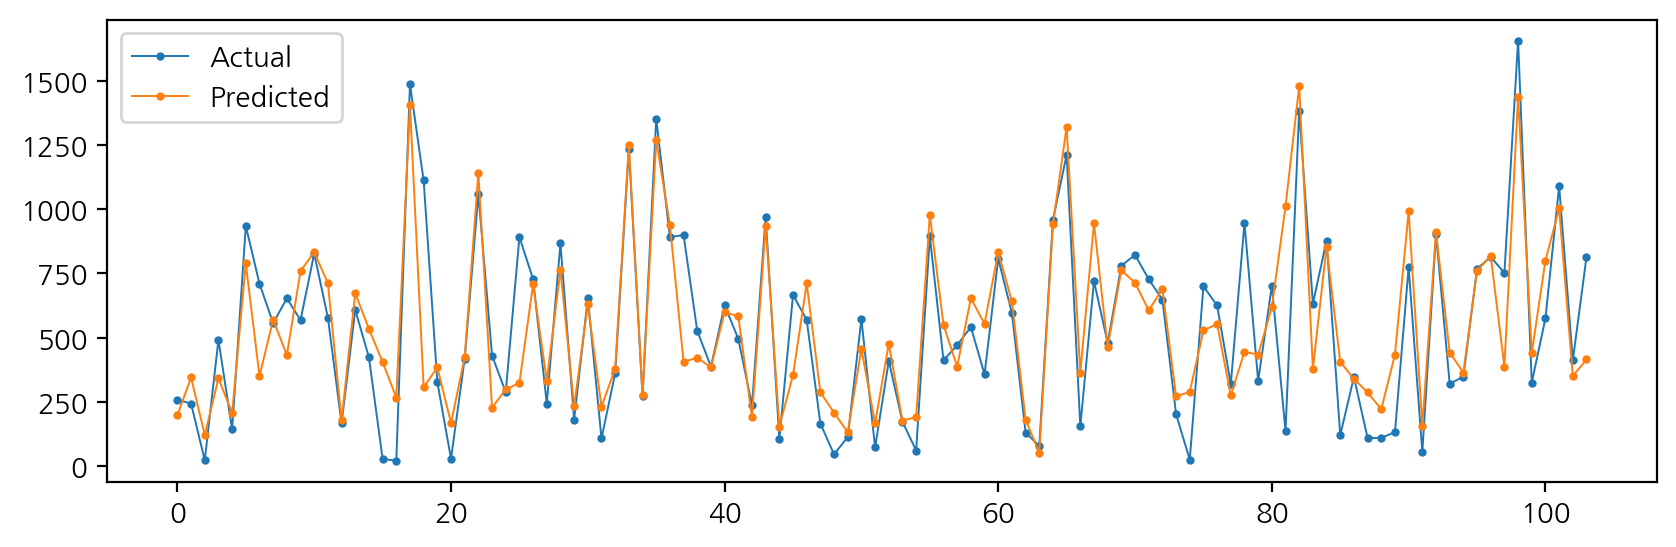

In [64]:
# 실젯값과 예측값 비교 시각화
model_plot(y_test, y_pred4)

### (7) 성능 비교

- 각 모델의 성능을 비교합니다.

In [66]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score)
print('=' * 40)

# 가장 큰 값을 가지는 알고리즘으로 model 지정
best_model_name = max(result, key=result.get)
print(f"가장 성능이 좋은 모델은: {best_model_name}")

# 모델을 선택하는 코드 예시
if best_model_name == 'Decision Tree':
    model = model1
elif best_model_name == 'KNN':
    model = model2
elif best_model_name == 'Random Forest':
    model = model3
elif best_model_name == 'XGBoost':
    model = model4
    
# 선택한 모델 확인
print(f"선택된 모델: {model}")

Decision Tree 0.6113863442949945
KNN 0.6129804776167364
Random Forest 0.6876475342158248
XGBoost 0.6917700925614235
가장 성능이 좋은 모델은: XGBoost
선택된 모델: GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=N

## 3. 파이프라인 구축

- 새로운 데이터를 불러오고, 이 데이터를 처리할 파이프라인 함수를 만듭니다.

### (1) New Data 불러오기

- test.xlsx 파일을 읽어와 new_data 데이터프레임으로 선언합니다.
- 해당 데이터는 '실차량수' 변수가 없는 것 외에는, 최초 데이터와 동일한 구조입니다.
- 이 데이터를 대상으로 전처리와 예측을 수행합니다.

In [69]:
# 파일 읽어오기
new_data = pd.read_excel(path+'test.xlsx')

# 확인
new_data.head()

,단지코드,단지명,총세대수,전용면적별세대수,지역,준공일자,건물형태,난방방식,승강기설치여부,단지내주차면수,전용면적,공용면적,임대보증금,임대료
0,C0005,서울석촌 도시형주택(공임10년),20,6,서울,20121115,복도식,개별가스난방,전체동 설치,9,17.53,11.7251,50449000,263710
1,C0005,서울석촌 도시형주택(공임10년),20,10,서울,20121115,복도식,개별가스난방,전체동 설치,9,24.71,16.5275,52743000,321040
2,C0005,서울석촌 도시형주택(공임10년),20,4,서울,20121115,복도식,개별가스난방,전체동 설치,9,26.72,17.8720,53890000,332510
3,C0017,대구혁신센텀힐즈,822,228,대구경북,20180221,계단식,지역난방,NaN,824,51.87,20.9266,29298000,411200
4,C0017,대구혁신센텀힐즈,822,56,대구경북,20180221,계단식,지역난방,NaN,824,59.85,24.1461,38550000,462600


### (2) 데이터 파이프라인 구축

- 데이터 파이프라인 함수를 만듭니다.
- 학습 데이터에 대해 진행했던 모든 전처리 과정을 평가 데이터에도 일괄 진행해야 합니다.
    - 입력: new_data
    - 출력: 전처리가 완료된 예측 직전 데이터프레임
- 새로운 데이터에는 '실차량수' 변수가 없음을 유의합니다.
- 참고: 다음 내용들이 처리되어야 합니다.
    - 결측치 처리
    - 변수 추가
    - 불필요한 변수 제거
    - 단지 데이터, 상세 데이터 분리
    - 단지코드별 총면적 합 집계
    - 전용면적 구간별 집계 (피벗 형태)
    - 임대보증금, 임대료 평균 집계
    - 집계 결과 병합
    - 난방방식: 개별, 지역, 중앙 세 가지로 묶기
    - 승강기설치여부: 0, 1 값으로 변경
    - 단지모드, 지역 변수 제거
    - 가변수화

In [71]:
import pandas as pd

def data_pipeline(data):
    # 데이터 복사
    apt01 = data.copy()
    # 결측치가 있는 열 목록
    columns_with_na = ['건물형태', '난방방식', '승강기설치여부']
    
    # 각 열의 최빈값으로 결측치 채우기
    for column in columns_with_na:
        mode_value = apt01[column].mode()[0]  # 각 열의 최빈값 계산
        apt01[column].fillna(mode_value, inplace=True)  # 최빈값으로 결측치 채우기

    # '준공연도' 변수 추가 (준공일자에서 앞 4자리 추출)
    apt01['준공연도'] = apt01['준공일자'].astype(str).str[:4].astype(int)
    
    # '총면적' 변수 추가 (전용면적 + 공용면적) * 전용면적별세대수
    apt01['총면적'] = (apt01['전용면적'] + apt01['공용면적']) * apt01['전용면적별세대수']
    
    # 불필요한 변수 제거
    apt01.drop(columns=['단지명', '단지내주차면수', '준공일자'], inplace=True)

    # 단지별 데이터 분리
    data01 = apt01[['단지코드', '총세대수', '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부']].drop_duplicates()
    data01.reset_index(drop=True, inplace=True)

    # 상세 데이터 분리
    data02 = apt01[['단지코드', '총면적', '전용면적별세대수', '전용면적', '공용면적', '임대보증금', '임대료']]

    # 단지코드별 총면적 합 집계
    df_area = data02.groupby('단지코드')['총면적'].sum().reset_index()

    # 전용면적 구간 정의
    bins = [0, 10, 30, 40, 50, 60, 70, 80, 200]
    labels = ['면적0_10', '면적10_30', '면적30_40', '면적40_50', '면적50_60', '면적60_70', '면적70_80', '면적80_200']

    # 전용면적 구간 추가
    data02['전용면적구간'] = pd.cut(data02['전용면적'], bins=bins, labels=labels, right=False)

    # 단지코드와 전용면적구간별 전용면적별세대수 합 집계
    temp = data02.groupby(['단지코드', '전용면적구간'], as_index=False)['전용면적별세대수'].sum()

    # 피벗 형태로 변환
    df_pivot = temp.pivot(index='단지코드', columns='전용면적구간', values='전용면적별세대수')
    df_pivot.columns.name = None
    df_pivot.reset_index(inplace=True)

    # 단지코드별 임대보증금, 임대료 평균 집계
    df_rent = data02.groupby('단지코드', as_index=False).agg({
        '임대보증금': 'mean',
        '임대료': 'mean'
    })

    # 데이터프레임 조인
    base_data = data01.merge(df_area, on='단지코드', how='left') \
                      .merge(df_pivot, on='단지코드', how='left') \
                      .merge(df_rent, on='단지코드', how='left')

    # '난방방식' 변수 값 변경
    base_data['난방방식'] = base_data['난방방식'].replace({
        '개별가스난방': '개별',
        '개별유류난방': '개별',
        '지역난방': '지역',
        '지역가스난방': '지역',
        '지역유류난방': '지역',
        '중앙가스난방': '중앙',
        '중앙난방': '중앙',
        '중앙유류난방': '중앙'
    })

    # '승강기설치여부' 변수 값 변경
    base_data['승강기설치여부'] = base_data['승강기설치여부'].replace({
        '전체동 설치': 1,
        '일부동 설치': 0,
        '미설치': 0
    })

    # '단지코드'와 '지역' 변수 제거
    base_data.drop(columns=['단지코드', '지역'], inplace=True)

    # 가변수화 대상: '건물형태', '난방방식'
    dumm_cols = ['건물형태', '난방방식']

    # 가변수화 수행
    base_data = pd.get_dummies(base_data, columns=dumm_cols, drop_first=True, dtype=int)

    return base_data

### (3) 예측하기

- new_data를 파이프라인을 사용해 전처리한 후 가장 성능이 좋았던 모델로 예측한 결과를 확인합니다.

In [73]:
# 데이터 전처리
data = data_pipeline(new_data)

# 확인
data.head()

,총세대수,준공연도,승강기설치여부,총면적,면적0_10,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료,건물형태_복도식,건물형태_혼합식,난방방식_중앙,난방방식_지역
0,20,2012,1,766.2736,0,20,0,0,0,0,0,0,5.236067e+07,305753.333333,1,0,0,0
1,822,2018,1,31396.0944,0,0,0,0,404,0,0,0,3.546600e+07,445466.666667,0,0,0,1
2,112,2014,1,12450.4308,0,0,0,0,0,0,20,92,9.869750e+07,744450.000000,0,0,0,1
3,122,2011,1,13081.4772,0,0,0,0,0,0,22,100,0.000000e+00,0.000000,0,0,0,1
4,262,2011,1,28141.7516,0,0,0,0,0,0,77,185,0.000000e+00,0.000000,0,0,0,1


In [85]:
# 예측하기
predicted = model3.predict(data)

# 확인
print(predicted)

[ 194.65095252  395.24700455  499.7058996   498.91042684  639.12010366
  411.59341831  442.86830157  626.32614005  461.93898927  344.86344815
  255.01353944  191.67336731 1396.04821289  712.9262435   557.02007281
  695.77173427  621.43128661  231.83820647 1066.87251805  998.63834014
  286.51932918  825.41640965  832.35745799  832.57259072  853.08927456
  228.49075482  162.07928264 1289.3121395   289.46492925  757.2541028 ]


- 아파트 기본 정보에 예측한 차량수를 붙여 마무리합니다.

In [88]:
# 데이터 셋 두개로 나누기
vars = ['단지코드', '단지명', '총세대수', '지역', ]
result = new_data[vars].copy()
result = result.drop_duplicates()
result.reset_index(drop=True, inplace=True)

# 예측 결과 추가
result['예상차량수'] = predicted.round(1).astype(int)

# 확인
result

,단지코드,단지명,총세대수,지역,예상차량수
0,C0005,서울석촌 도시형주택(공임10년),20,서울,194
1,C0017,대구혁신센텀힐즈,822,대구경북,395
2,C0034,광교 호반마을 22단지 아파트,112,경기,499
3,C0046,죽미마을 휴먼시아12단지,122,경기,498
4,C0055,파주운정 한울마을 6단지,262,경기,639
5,C0072,벌교제석휴먼시아,35,광주전남,411
6,C0073,무안남악오룡마을,47,광주전남,442
7,C0084,진해 석동우림필유 아파트,152,경남,626
8,C0085,김해북부 두산위브 아파트,73,경남,461
9,C0112,운암주공6단지아파트,571,경기,344
